In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk
import scipy as sp

# Part 1

## 1) Consider the data set NYCtemp.xlsx containning the daily high and low temperature recorded in central park over a 10–year period.
## The third column, labeled ‘temp’, is just an average of the high and low.

##Suppose we perform linear regression temp ∼ c1 + c2t + c3 cos(2πt) + c4 sin(2πt) where t ranges from 0 (=Sept 8 2014) to 10 (=Sept 8 2024).

##Find c2 and claim global warming

### Import Data

In [16]:
# Load the Excel file into a DataFrame
data = pd.read_excel("/content/NYCtemp-1.xlsx")

# Display the first few rows of the DataFrame
print(data.head())

   TMAX  TMIN  temp
0    75    65  70.0
1    73    63  68.0
2    80    63  71.5
3    83    69  76.0
4    78    62  70.0


### Prepare Data

In [45]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Create a time variable (assuming the data is evenly spaced by days)
data['t'] = np.linspace(0, 10, len(data))

# Define the regression terms
data['cos_term'] = np.cos(2 * np.pi * data['t'])
data['sin_term'] = np.sin(2 * np.pi * data['t'])

# Define the independent variables and the dependent variable (temp)
X = data[['t', 'cos_term', 'sin_term']]
X = sm.add_constant(X)  # Add intercept
y = data['temp']

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary to get the coefficient c2
print(model.summary())

# After fitting the model
t_coef = model.params['t']  # Extract the coefficient for 't'

# Print out the coefficient for 't'
print(f"c2 is: {t_coef}")


                            OLS Regression Results                            
Dep. Variable:                   temp   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     5209.
Date:                Sun, 06 Oct 2024   Prob (F-statistic):               0.00
Time:                        18:25:33   Log-Likelihood:                -12465.
No. Observations:                3654   AIC:                         2.494e+04
Df Residuals:                    3650   BIC:                         2.496e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         56.1063      0.243    230.651      0.0

We can claim global warming, as t is statistically significant, with p<.05

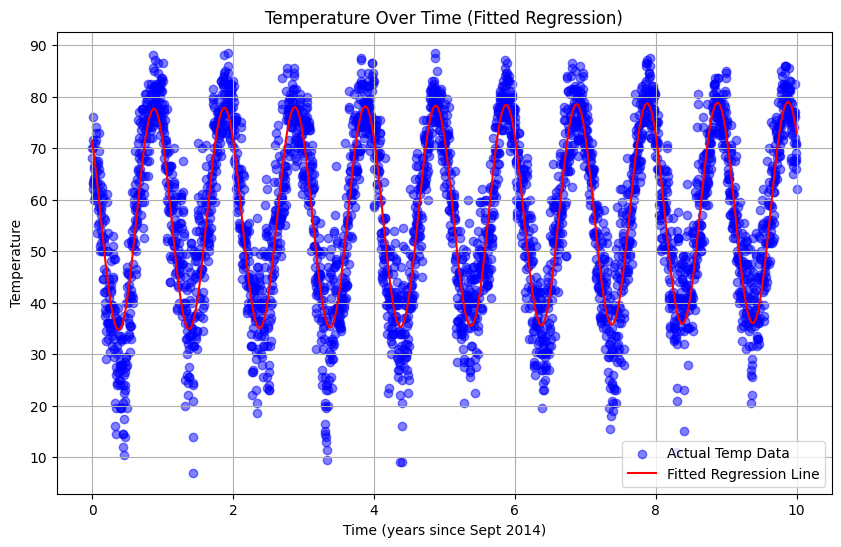

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting the actual temperature data
plt.figure(figsize=(10,6))
plt.scatter(data['t'], data['temp'], color='blue', label='Actual Temp Data', alpha=0.5)

# Generating the fitted values from the regression model
# Use the coefficients from the model summary
c1 = 56.1063  # Intercept
c2 = 0.1442   # Coefficient for t
c3 = 15.2939  # Coefficient for cos(2*pi*t)
c4 = -14.9943 # Coefficient for sin(2*pi*t)

# Generating the fitted curve (predicted temp values)
data['fitted_temp'] = c1 + c2 * data['t'] + c3 * np.cos(2 * np.pi * data['t']) + c4 * np.sin(2 * np.pi * data['t'])

# Plot the regression line (fitted temp values)
plt.plot(data['t'], data['fitted_temp'], color='red', label='Fitted Regression Line')

# Customize the plot
plt.title('Temperature Over Time (Fitted Regression)')
plt.xlabel('Time (years since Sept 2014)')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


#Part 2


##Generate a random 6-by-4 matrix M and let A = M^T M and B = M M^T , so A is 4-by-4 and B is not. Show that the positive eigenvalues of A and B are identical. Try a different M of different size and see that the same observation holds. Can you prove such statement?

In [4]:
rmatrix = np.random.rand(6, 4)
print(f"random 6x4 matrix: \n{rmatrix}")
print("\n")

Trmatrix = rmatrix.T
print(f"Transpose of random 6x4 matrix: \n{Trmatrix}")
print("\n")


A = np.dot(Trmatrix,rmatrix)
print(f"A = M^T M: \n{A}")
print("\n")

B = np.dot(rmatrix,Trmatrix)
print(f"B = M M^T: \n{B}")
print("\n")

# Define a threshold for numerical precision
threshold = 1e-12

# Compute eigenvalues for A and B
eigenvaluesA = np.linalg.eigvals(A)
eigenvaluesB = np.linalg.eigvals(B)

# Filter out small eigenvalues (numerical noise) using the threshold
positive_eigenvaluesA = eigenvaluesA[eigenvaluesA > threshold]
positive_eigenvaluesB = eigenvaluesB[eigenvaluesB > threshold]

# Output the results
print("Filtered Positive Eigenvalues A:", positive_eigenvaluesA)
print("Filtered Positive Eigenvalues B:", positive_eigenvaluesB)

random 6x4 matrix: 
[[0.66545549 0.80481634 0.61502679 0.74376242]
 [0.34870194 0.33697763 0.22008084 0.024734  ]
 [0.59908373 0.23389879 0.78507756 0.98392323]
 [0.12395672 0.45713351 0.78032886 0.70623892]
 [0.14709317 0.15647329 0.41468125 0.16747442]
 [0.62563083 0.81565476 0.41339316 0.58332962]]


Transpose of random 6x4 matrix: 
[[0.66545549 0.34870194 0.59908373 0.12395672 0.14709317 0.62563083]
 [0.80481634 0.33697763 0.23389879 0.45713351 0.15647329 0.81565476]
 [0.61502679 0.22008084 0.78507756 0.78032886 0.41468125 0.41339316]
 [0.74376242 0.024734   0.98392323 0.70623892 0.16747442 0.58332962]]


A = M^T M: 
[[1.35174097 1.38317885 1.37269806 1.57014437]
 [1.38317885 1.71473953 1.51156174 1.66191174]
 [1.37269806 1.51156174 1.99480789 2.09702494]
 [1.57014437 1.66191174 2.09702494 2.38899378]]


B = M M^T: 
[[2.02200084 0.65700256 1.80155799 1.45559332 0.60341748 1.76088827]
 [0.65700256 0.28419431 0.48483721 0.38647126 0.19942538 0.59842408]
 [1.80155799 0.48483721 1.9980

In [5]:
rmatrix = np.random.rand(3, 2)
print(f"random 6x4 matrix: \n{rmatrix}")
print("\n")

Trmatrix = rmatrix.T
print(f"Transpose of random 6x4 matrix: \n{Trmatrix}")
print("\n")


A = np.dot(Trmatrix,rmatrix)
print(f"A = M^T M: \n{A}")
print("\n")

B = np.dot(rmatrix,Trmatrix)
print(f"B = M M^T: \n{B}")
print("\n")

# Define a threshold for numerical precision
threshold = 1e-12

# Compute eigenvalues for A and B
eigenvaluesA = np.linalg.eigvals(A)
eigenvaluesB = np.linalg.eigvals(B)

# Filter out small eigenvalues (numerical noise) using the threshold
positive_eigenvaluesA = eigenvaluesA[eigenvaluesA > threshold]
positive_eigenvaluesB = eigenvaluesB[eigenvaluesB > threshold]

# Output the results
print("Filtered Positive Eigenvalues A:", positive_eigenvaluesA)
print("Filtered Positive Eigenvalues B:", positive_eigenvaluesB)

random 6x4 matrix: 
[[0.140785   0.36230895]
 [0.32413858 0.01421999]
 [0.63964767 0.35237531]]


Transpose of random 6x4 matrix: 
[[0.140785   0.32413858 0.63964767]
 [0.36230895 0.01421999 0.35237531]]


A = M^T M: 
[[0.53403538 0.28101296]
 [0.28101296 0.25563834]]


B = M M^T: 
[[0.15108819 0.05078588 0.21772153]
 [0.05078588 0.10526803 0.21234527]
 [0.21772153 0.21234527 0.53331751]]


Filtered Positive Eigenvalues A: [0.70843615 0.08123758]
Filtered Positive Eigenvalues B: [0.70843615 0.08123758]


##Proof:

##Let
##B=ATA and C=AAT
##Let the Eigen value of B be λ and Corresponding Eigen Vector be X,
##Then BX=λX⟹ATAX=λX Pre Multiplying with A we get
##AA^TAX=λAX⟹CY=λY
##So λ is an Eigen Value of C
##and note that Y=AX is an Eigen Vector of C

#Part 3

#Let A =
##[6.29 −1.44 −1.92]
##[−1.44 0.61 0.48]
##[−1.92 0.48 0.89],

##a typical 3 × 3 symmetric matrix. Pick a random vector x0 ∈ R3 of magnitude 1, (don’t pick the 0 vector for example), define recursively

##xk+1 = scaling factor × Axk

##where the scaling factor is so that the magnitude of xk+1 is 1. What does this sequence of vectors converge to? Show that xk converges to the same limiting vector regardless of what x0 is.


In [56]:
import numpy as np

def recursive_power_iteration(A, x_k, tol=1e-12, max_iter=1000, iteration=0):
    # Multiply by matrix A
    x_k1 = np.dot(A, x_k)

    # Normalize the new vector to unit length
    x_k1 = x_k1 / np.linalg.norm(x_k1)

    # Check for convergence: if the change is small enough, stop recursion
    if np.linalg.norm(x_k1 - x_k) < tol or iteration >= max_iter:
        print(f'Converged after {iteration+1} iterations.')
        return x_k1

    # Recurse with the new vector
    return recursive_power_iteration(A, x_k1, tol, max_iter, iteration + 1)

# Example matrix A
A = np.array([[6.29, -1.44, -1.92],
              [-1.44, 0.61, 0.48],
              [-1.92, 0.48, 0.89]])



In [59]:
# Random initial vector x_0 of magnitude 1
x_0 = np.random.rand(3)
x_0 = x_0 / np.linalg.norm(x_0)  # Normalize

# Perform recursive power iteration
dominant_eigenvector = recursive_power_iteration(A, x_0)
print(f'Dominant eigenvector: {dominant_eigenvector}')


Converged after 11 iterations.
Dominant eigenvector: [-0.92847669  0.22283441  0.29711254]


In [60]:
# Random initial vector x_0 of magnitude 1
x_0 = np.random.rand(3)
x_0 = x_0 / np.linalg.norm(x_0)  # Normalize

# Perform recursive power iteration
dominant_eigenvector = recursive_power_iteration(A, x_0)
print(f'Dominant eigenvector: {dominant_eigenvector}')


Converged after 10 iterations.
Dominant eigenvector: [ 0.92847669 -0.22283441 -0.29711254]


The sequence converges to the same limiting vector regardless of x_0